In [1]:
import pandas as pd
import numpy as np
from SimilarityDetectModel import ComputeSimilarity,ComputeEuclideanDistance,ComputeDTWDistance,ComputeCosineSimilarity,ComputeFrechetDistance,ComputeHausdorffDistance,ComputeLongestCommonSubsequenceSimilarity
import matplotlib.pyplot as plt
from ConvertChineseToPinyin import convert_to_pinyin_initials
from pypinyin import pinyin, Style
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = 'plotly_white'
plot_template = dict(
    layout=go.Layout({
        'font_size': 8,
        'xaxis_title_font_size': 8,
        'yaxis_title_font_size': 8,
        }   
))
import matplotlib.pyplot as plt


Maduo


1 评估唐乃亥水文站汛期开始时间

638.0869414773226


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


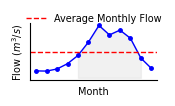

In [2]:
hydro_station= 'Tangnaihai'
monthly_flow = pd.read_csv(f'../data/{hydro_station.lower()}_natural_monthly_flow.csv',parse_dates=['date'],index_col=['date'])
monthly_flow
# 添加月份列
monthly_flow['month'] = monthly_flow.index.month

# get the average the monthlyflow
monthly_flow_avg = monthly_flow['flow(m^3/s)'].mean()

print(monthly_flow_avg)

# 计算每个月的多年平均值
monthly_avg = monthly_flow.groupby('month')['flow(m^3/s)'].mean()

# Visualize the month monthly_avg
fig = px.line(monthly_avg, title=f'Observed Flow')
# Add a horizontal line
fig.add_shape(
    type='line',
    x0=0,
    y0=monthly_flow_avg,
    x1=12,
    y1=monthly_flow_avg,
    line=dict(
        color='Red',
        width=2,
        dash='dashdot',
    ),
    name='Horizontal Line'
)
fig.show()

# Plot the avergae monthly flow
font_size = 7
plt.figure(figsize=(1.5, 0.8))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', color='b',linewidth=1,markersize=2.5)
plt.axhline(y=monthly_flow_avg, color='r', linestyle='--', label='Average Monthly Flow',linewidth=1)
# 填充5月到11月之间的区域
plt.fill_between(monthly_avg.index[4:11], 0, monthly_avg.values[4:11], color='lightgray', alpha=0.3)
plt.xlabel('Month', fontsize=font_size)
plt.ylabel('Flow ($m^3/s$)', fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
# set the scientific notation
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.gca().yaxis.get_offset_text().set_fontsize(font_size) 
plt.legend(fontsize=font_size,bbox_to_anchor=(0.5, 1.08), loc='center',frameon=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# invisible the ticks on y-axis
plt.gca().tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.gca().tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.subplots_adjust(left=0.115, right=0.96, top=0.88, bottom=0.16)
plt.savefig(f'../figs/MultiYearAverageObservedFlow_minmap.png',format='png',dpi=300,transparent=True)
plt.savefig(f'../figs/MultiYearAverageObservedFlow_minmap.eps',format='eps',dpi=1000,transparent=True)
plt.show()


2 Get similarity year of each meteorological station based on the precipitation data in the catchment controled by Tangnaihai station at the Upper Reach of Yellow.

The meteorological stations include 玛多、达日、久治、红原、若尔盖、玛曲、河南、兴海


In [3]:
station_names = [ # Tangnaihai
    '玛多',# 1957-2019
    '达日',# 1956-2019
    # '甘德',
    '久治',# 1958-2019
    '红原',#1960-2019
    '若尔盖',#1959-2019
    '玛曲',#1969-2019
    '玛沁',#1959-2019
    '河南',#1959-2019
    # '泽库',
    # '同德',
    '兴海',#1960-2019
]

# the target years
tar_years = [2014,2015,2016,2017,2018] # pred years 2015-2019

df_sim = pd.DataFrame(index=tar_years)
df_sim.index.name = 'tar_year'
start_month = '01'

for station in station_names:
    df = pd.read_csv('D:/DataSpace/HydroMeteAnthropicDatabase/7.FilledRawMeteObsInfo/ChinaLandDailyMeteV3(InsertSolarRadiation)/{}.csv'.format(station),parse_dates=['DATE'],index_col=['DATE'])
    df_precp = df['P2020(mm)']
    if station=='久治':
        df_precp = df.loc['1959-01-1':,'P2020(mm)']
    elif station=='红原':
        df_precp = df.loc['1961-01-1':,'P2020(mm)']
    elif station=='河南':
        df_precp = df.loc['1960-01-1':,'P2020(mm)']
    df_precp = df_precp.resample('ME').sum()
    sim_years = []
    for tar_year in tar_years:
        df_precp_tar = df_precp['{}-{}-01'.format(tar_year,start_month):'{}-12-31'.format(tar_year)]
        df_precp_ref = df_precp[:'{}-12-31'.format(tar_year-1)]
        sim_df, sim_year_dict = ComputeSimilarity(df_precp_tar,df_precp_ref)
        sim_years.append(sim_year_dict['Similarity Score'])
    df_sim[station] = sim_years

df_sim.to_csv(f'../result/SimilarityYears_{hydro_station}.csv')

df_sim




,玛多,达日,久治,红原,若尔盖,玛曲,玛沁,河南,兴海
tar_year,,,,,,,,,
2014,2011,2004,1976,1981,1963,1985,1996,1980,1999
2015,1986,1992,2011,1986,1969,2000,1987,2000,2011
2016,2005,1973,1997,1996,1991,2003,2004,1976,2006
2017,1983,1974,2004,2001,2014,2014,1973,2016,1981
2018,2007,2015,2006,1984,2011,1985,2009,1992,2008


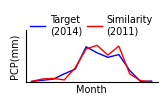

In [4]:
station_names = [ # Tangnaihai
    '玛多',# 1957-2019
    '达日',# 1956-2019
    # '甘德',
    '久治',# 1958-2019
    '红原',#1960-2019
    '若尔盖',#1959-2019
    '玛曲',#1969-2019
    '玛沁',#1959-2019
    '河南',#1959-2019
    # '泽库',
    # '同德',
    '兴海',#1960-2019
]

years = np.array([2014,2015, 2016, 2017, 2018]) # pred years 2015-2019

for station in station_names:
    df = pd.read_csv('D:/DataSpace/HydroMeteAnthropicDatabase/7.FilledRawMeteObsInfo/ChinaLandDailyMeteV3(InsertSolarRadiation)/{}.csv'.format(station),parse_dates=['DATE'],index_col=['DATE'])
    df_precp = df['P2020(mm)']
    if station=='久治':
        df_precp = df.loc['1959-01-1':,'P2020(mm)']
    elif station=='红原':
        df_precp = df.loc['1961-01-1':,'P2020(mm)']
    elif station=='河南':
        df_precp = df.loc['1960-01-1':,'P2020(mm)']
    df_precp = df_precp.resample('ME').sum()

    x = list(range(int(start_month),13))


    
    # fig, axs = plt.subplots(1, 5, figsize=(15, 8))
    # print(axs)

    for i in range(5):
        tar_year = years[i]
        ref_year = df_sim.loc[tar_year,station]
        # axs[i].plot(x,df_precp['{}-{}-01'.format(tar_year,start_month):'{}-12-31'.format(tar_year)].values,color='blue',label='target({})'.format(tar_year))
        # axs[i].plot(x,df_precp['{}-{}-01'.format(ref_year,start_month):'{}-12-31'.format(ref_year)].values,color='red',label='reference({})'.format(ref_year))
        # axs[i].set_xlabel('month')
        # axs[i].set_ylabel('Precipitation(mm)')
        # axs[i].set_title(convert_to_pinyin_initials(station))
        # axs[i].legend(fontsize=8,)

        ###!# plot minimap for similarity year====start
        if station=='玛多' and tar_year==2014:
            # Plot the avergae monthly flow
            font_size = 7
            plt.figure(figsize=(1.5, 0.8))
            plt.plot(x,df_precp['{}-{}-01'.format(tar_year,start_month):'{}-12-31'.format(tar_year)].values,color='blue',label='Target\n({})'.format(tar_year),linewidth=1)
            plt.plot(x,df_precp['{}-{}-01'.format(ref_year,start_month):'{}-12-31'.format(ref_year)].values,color='red',label='Similarity\n({})'.format(ref_year),linewidth=1)
            plt.xlabel('Month', fontsize=font_size, labelpad=2)
            plt.ylabel('PCP(mm)', fontsize=font_size)
            plt.xticks(fontsize=font_size-1)
            plt.yticks(fontsize=font_size)
            plt.legend(fontsize=font_size,bbox_to_anchor=(0.5, 1.08), loc='center',frameon=False,ncol=2,
                       columnspacing=0.5,
                       handlelength=1.5,
                       handletextpad=0.5,
                       borderaxespad=0.5,
                       borderpad=0.5,
                        labelspacing=0.5,)
            plt.gca().spines['top'].set_visible(False)
            plt.gca().spines['right'].set_visible(False)
            plt.gca().tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
            plt.gca().tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
            # set ylim
            plt.ylim(0, 120)
            plt.subplots_adjust(left=0.1, right=0.98, top=0.815, bottom=0.16)
            plt.savefig(f'../figs/MaduoPCP_SimYear_minmap.png',format='png',dpi=300,transparent=True)
            plt.savefig(f'../figs/MaduoPCP_SimYear_minmap.eps',format='eps',dpi=1000,transparent=True)
            plt.show()
        ###!# plot minimap for similarity year====end

    # 调整子图之间的间距
    # plt.tight_layout()

    # 显示绘图
    # plt.show()

    

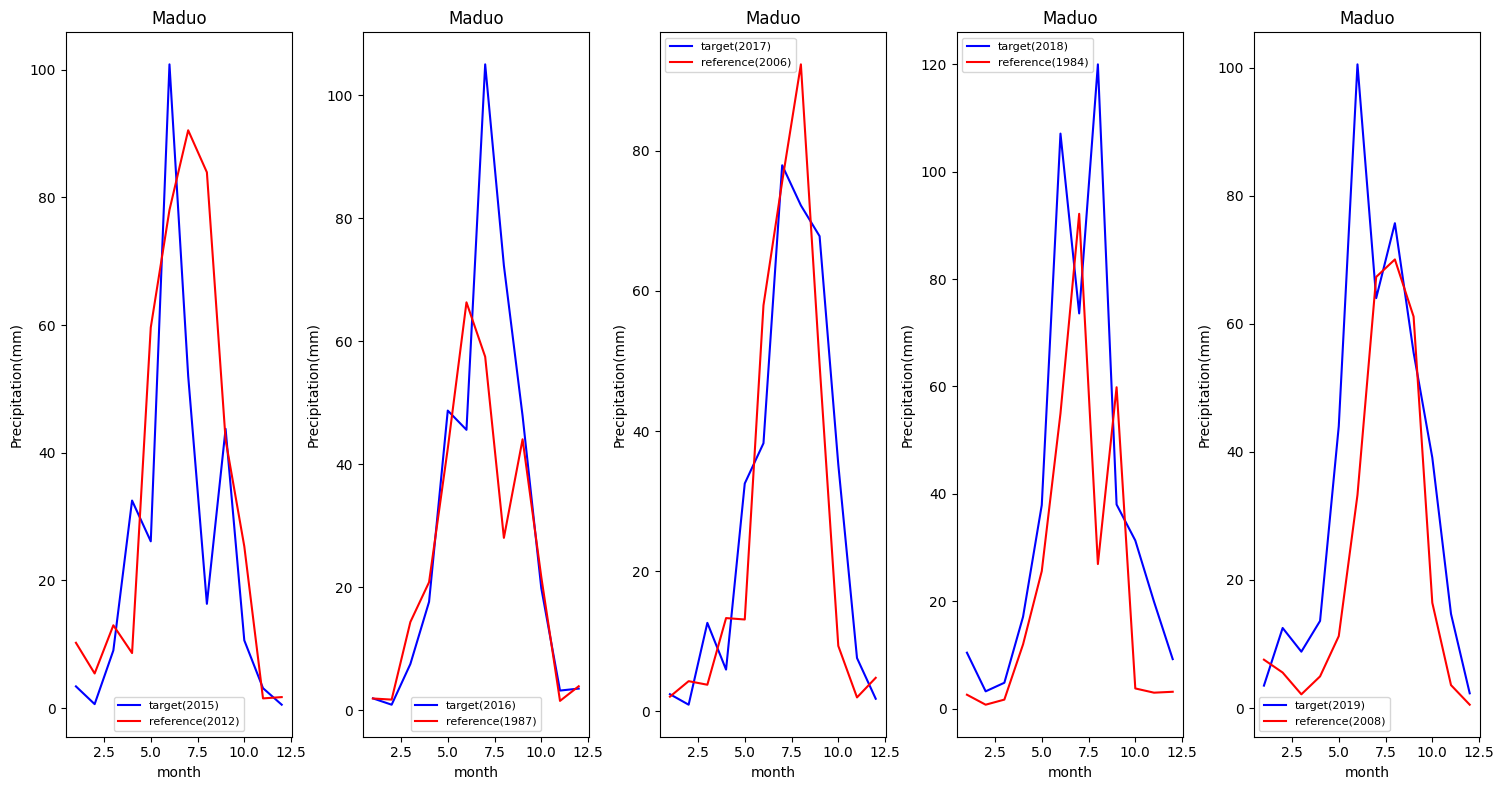

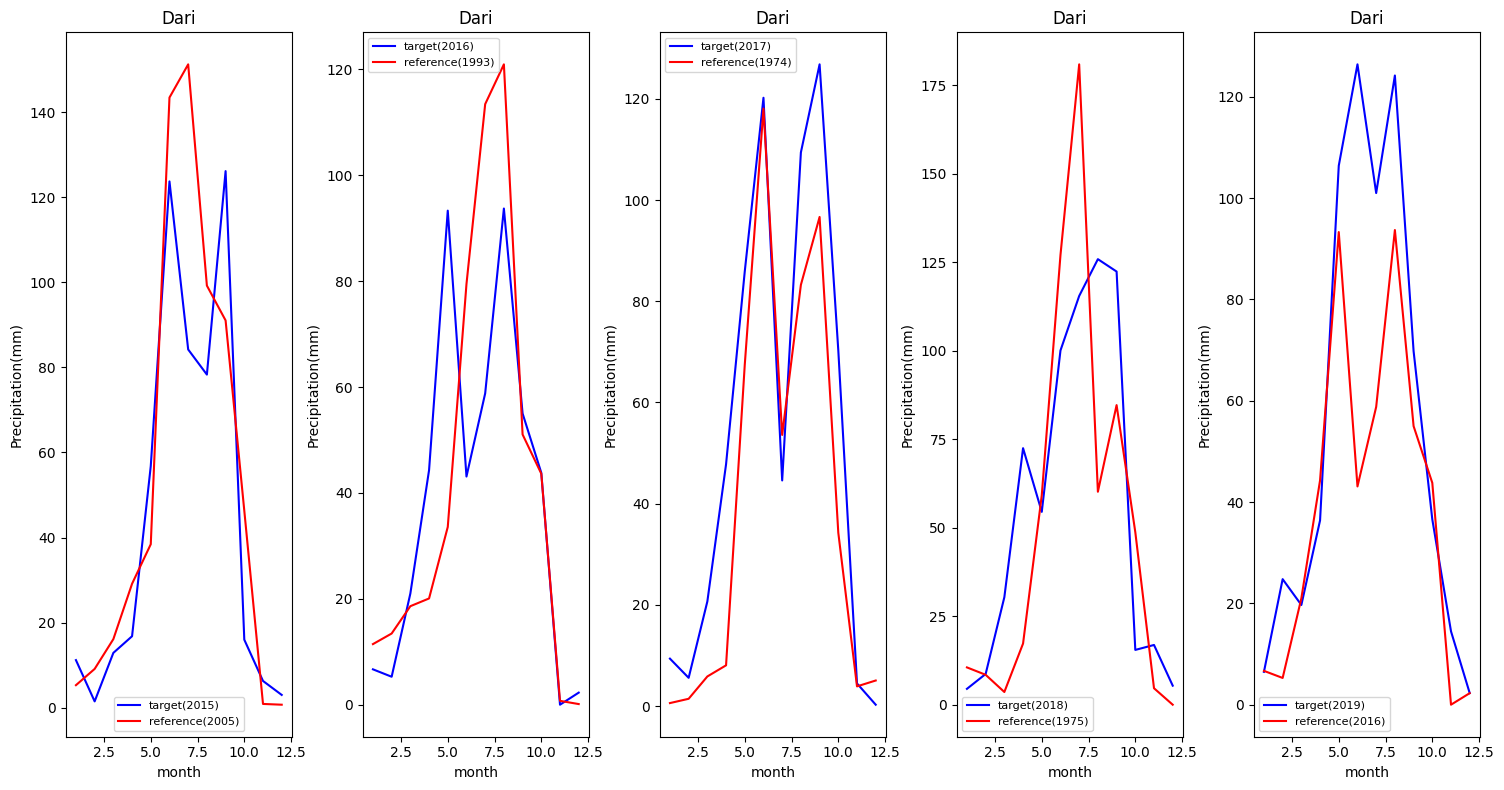

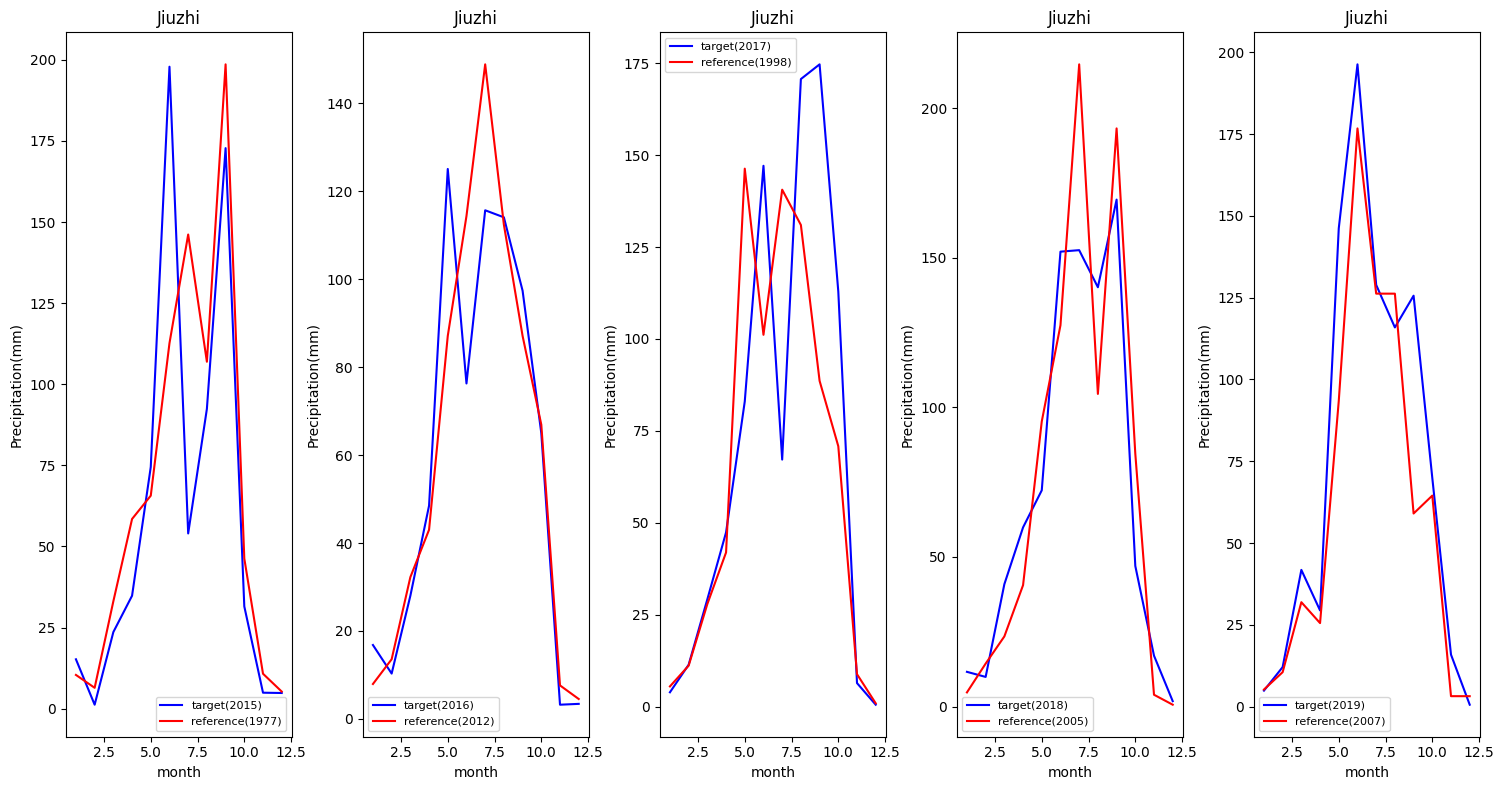

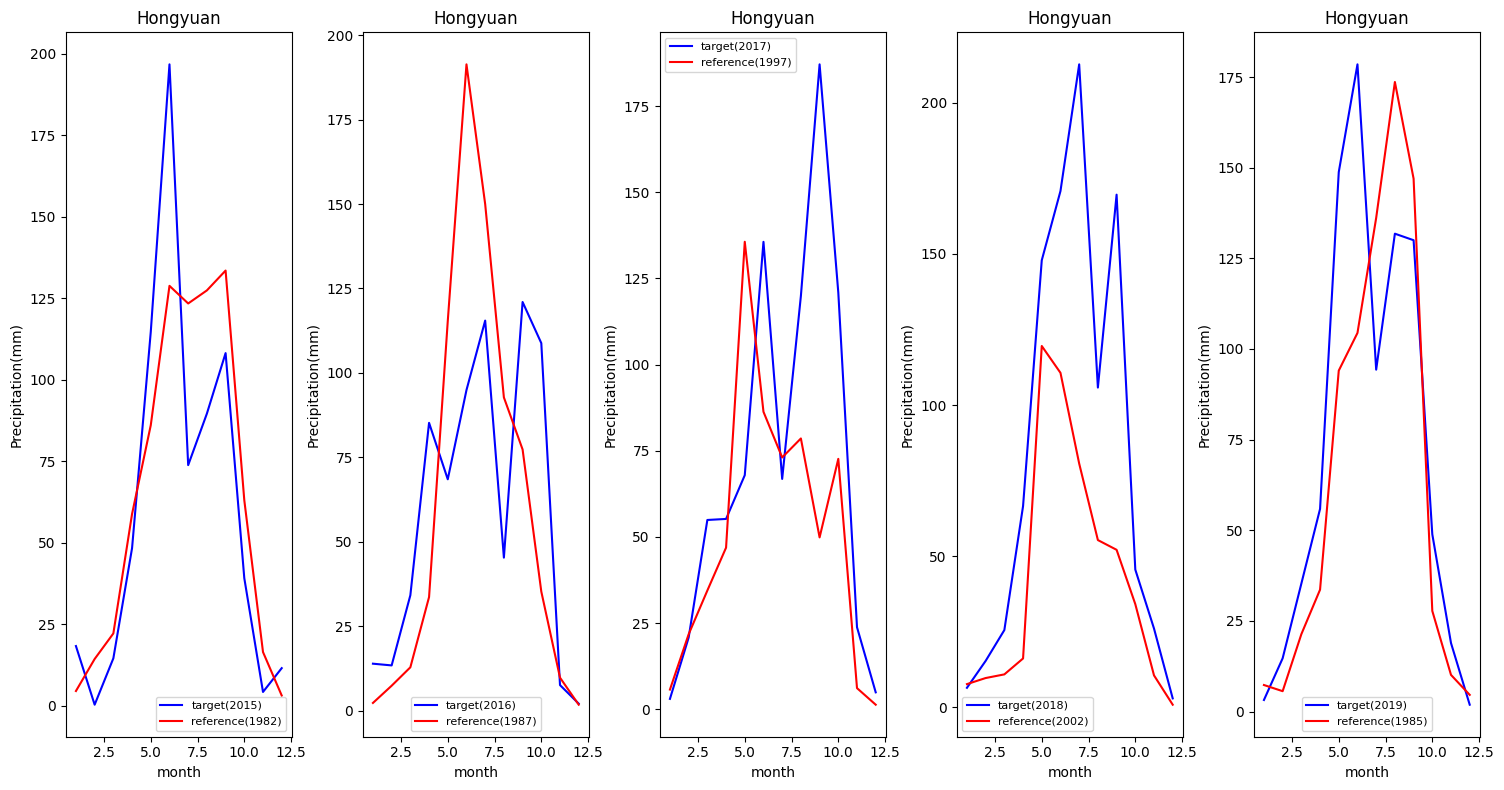

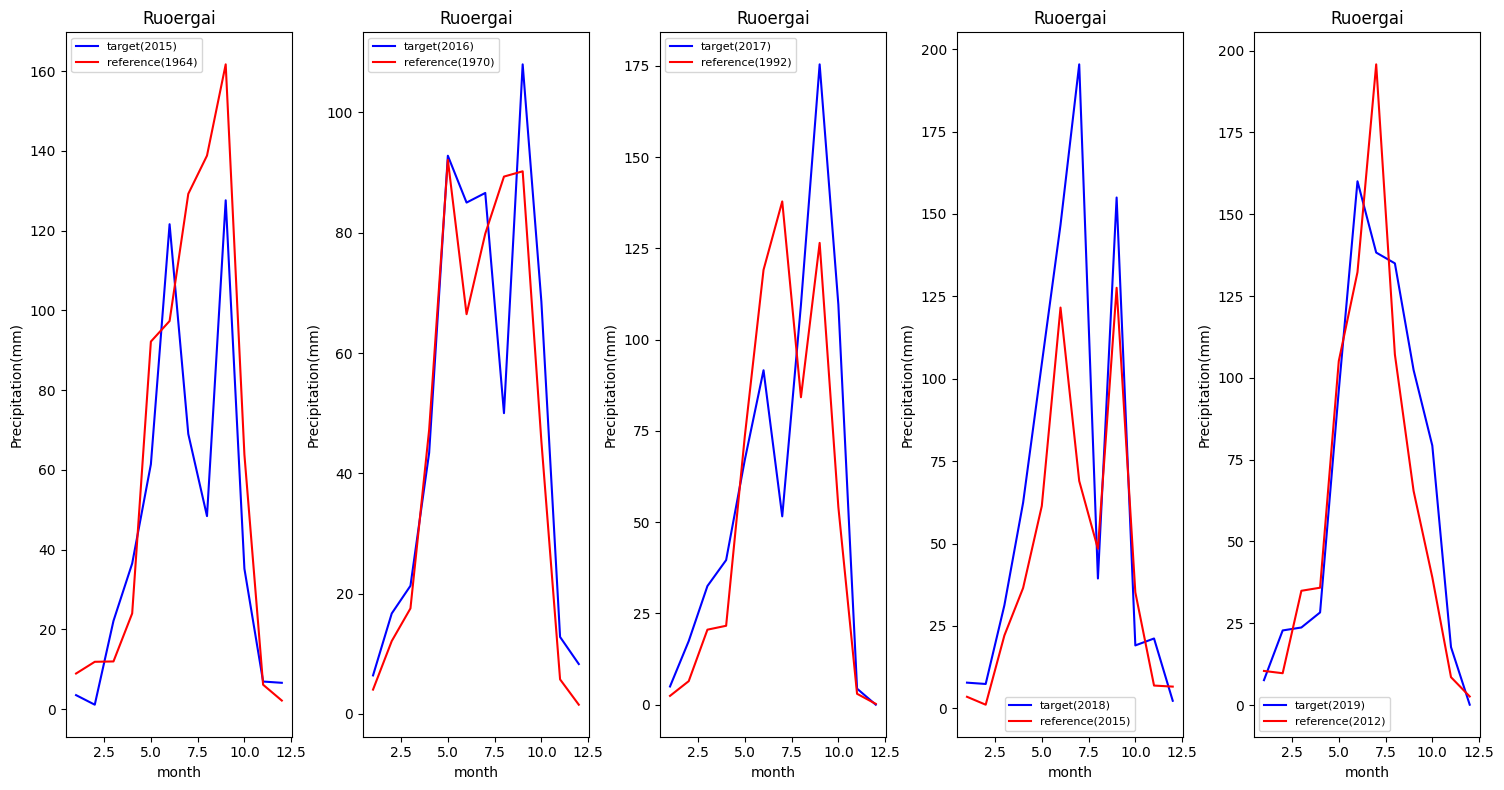

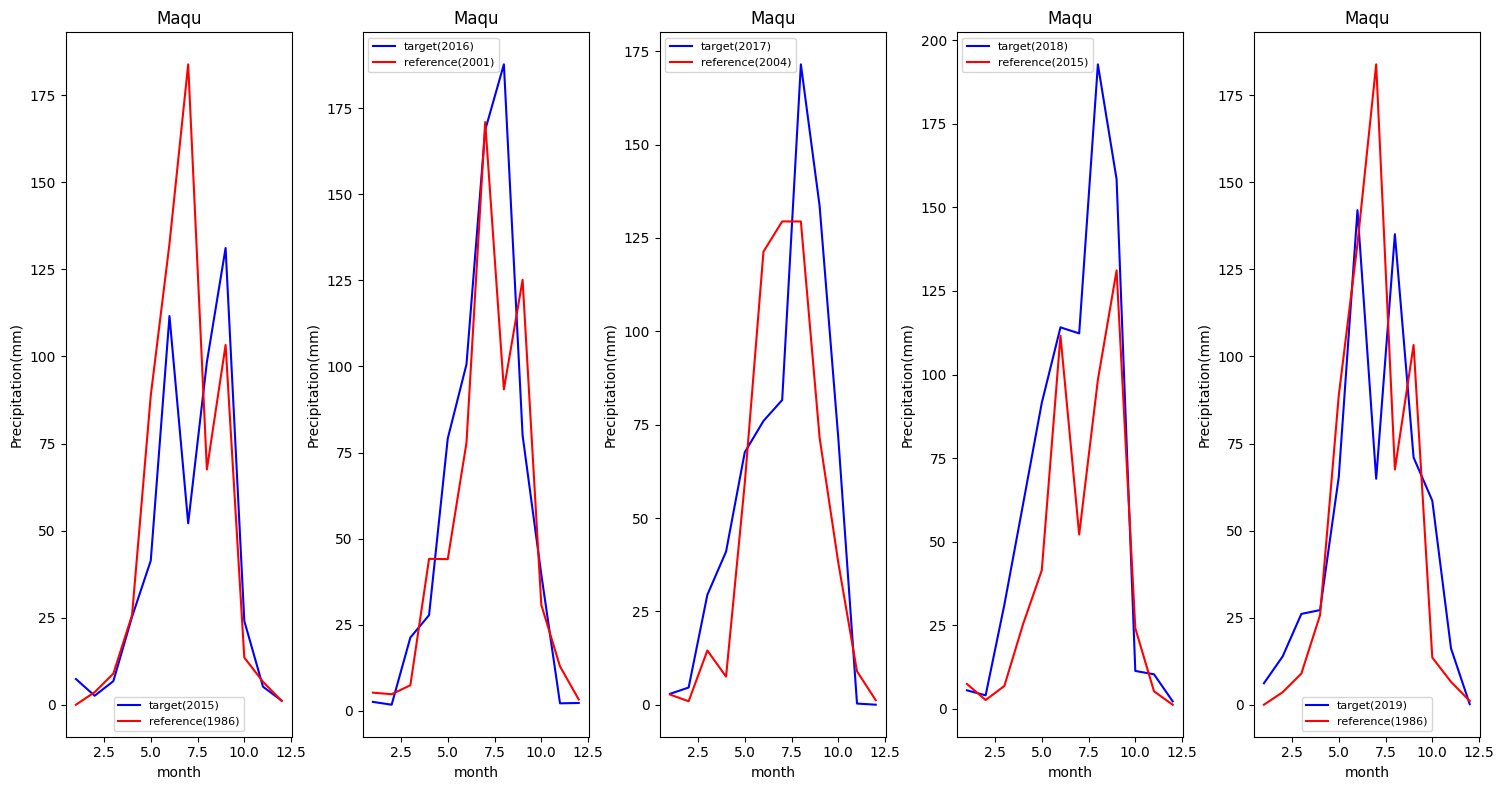

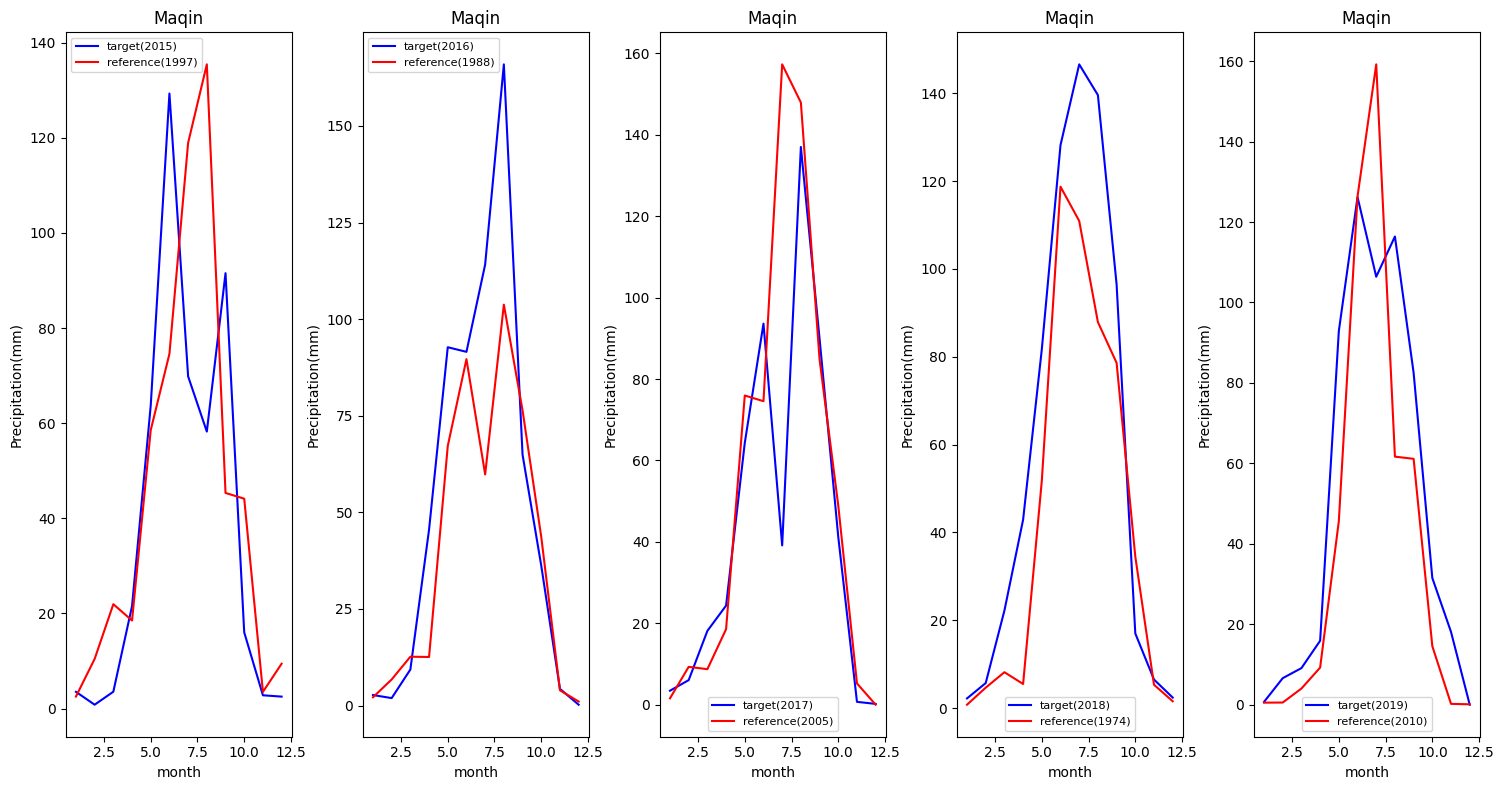

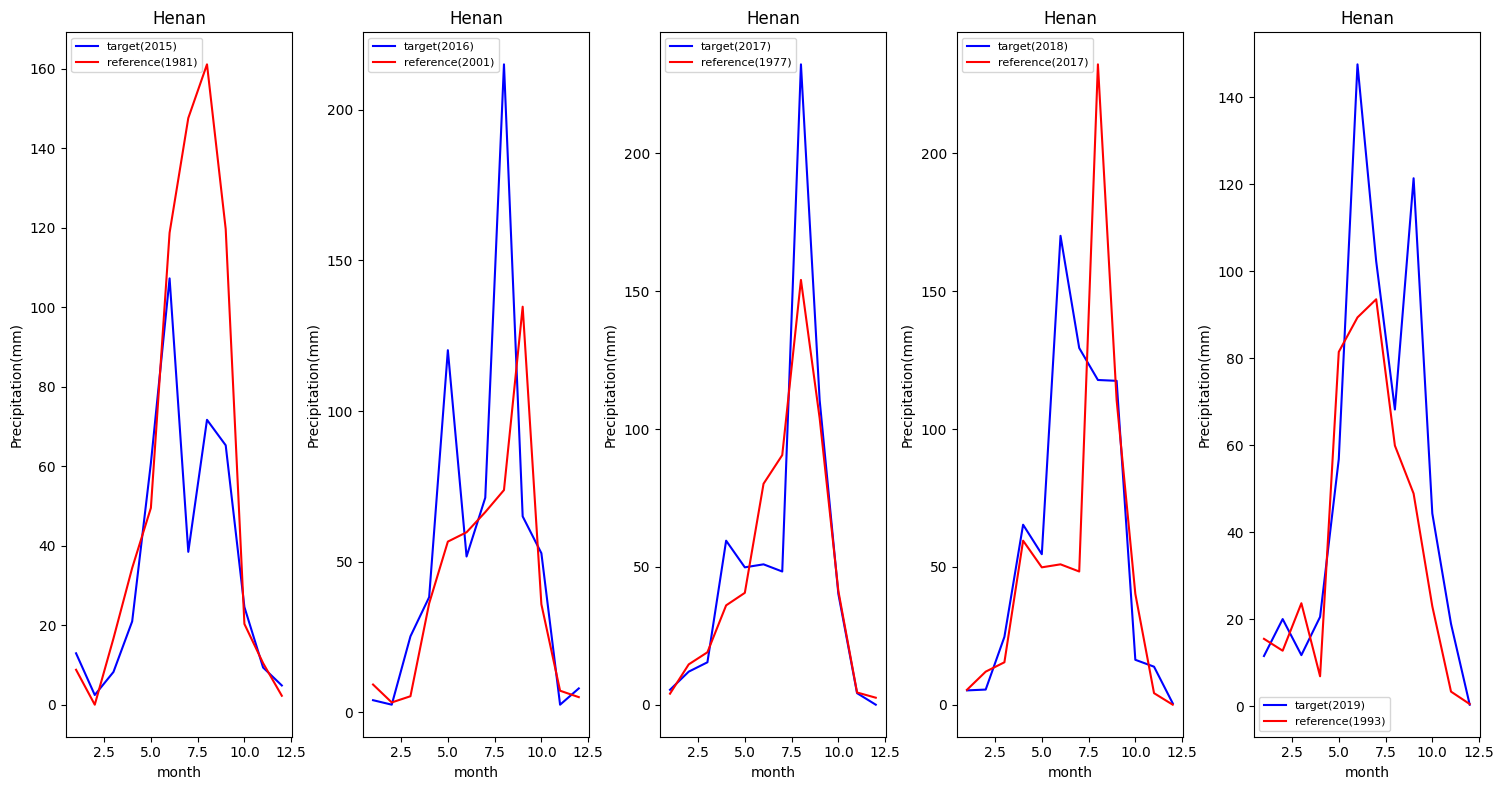

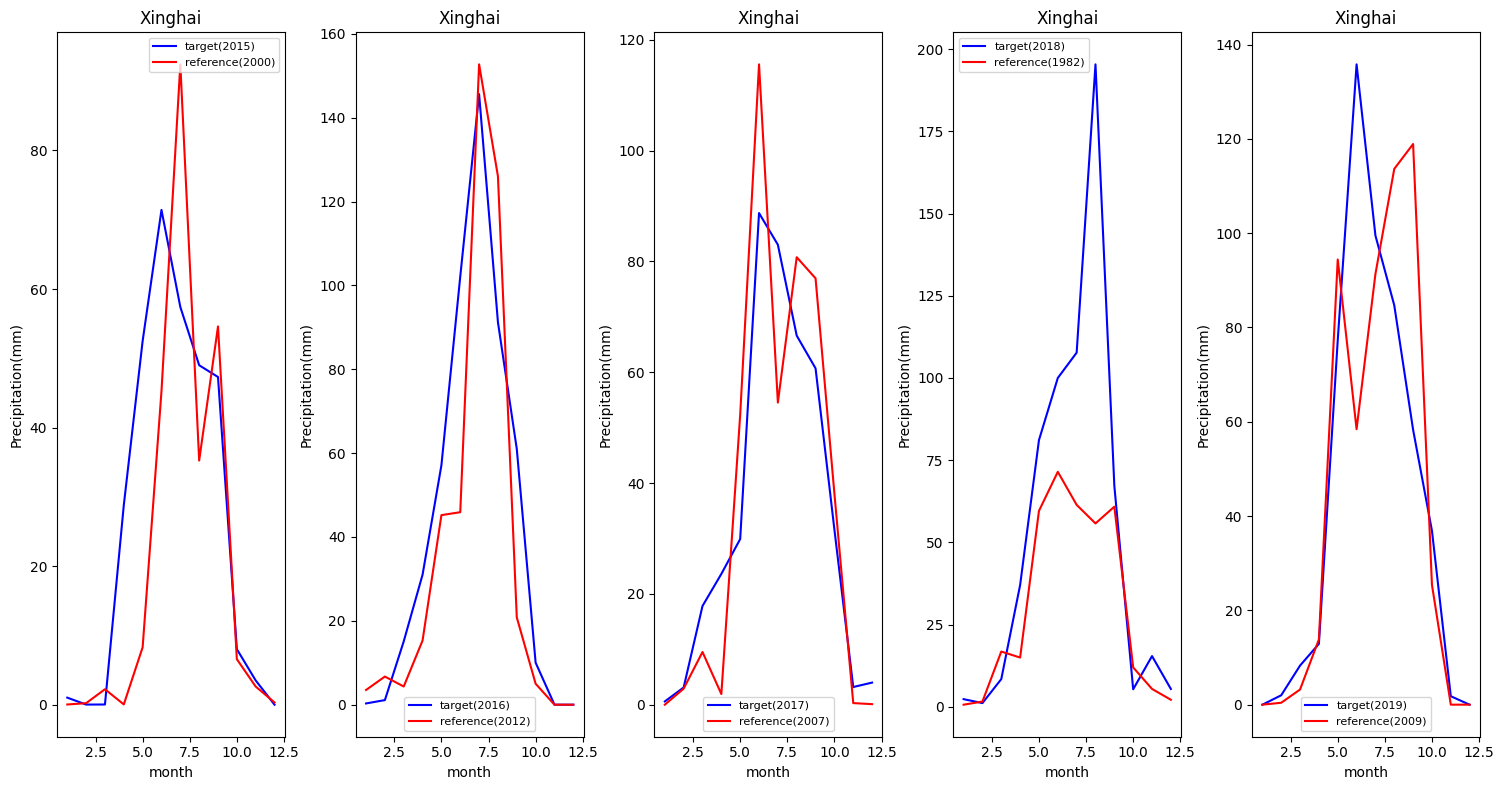

In [8]:
station_names = [ # Tangnaihai
    '玛多',# 1957-2019
    '达日',# 1956-2019
    # '甘德',
    '久治',# 1958-2019
    '红原',#1960-2019
    '若尔盖',#1959-2019
    '玛曲',#1969-2019
    '玛沁',#1959-2019
    '河南',#1959-2019
    # '泽库',
    # '同德',
    '兴海',#1960-2019
]

years = np.array([2014, 2015, 2016, 2017, 2018])

for station in station_names:
    df = pd.read_csv('D:/DataSpace/HydroMeteAnthropicDatabase/7.FilledRawMeteObsInfo/ChinaLandDailyMeteV3(InsertSolarRadiation)/{}.csv'.format(station),parse_dates=['DATE'],index_col=['DATE'])
    df_precp = df['P2020(mm)']
    if station=='久治':
        df_precp = df.loc['1959-01-1':,'P2020(mm)']
    elif station=='红原':
        df_precp = df.loc['1961-01-1':,'P2020(mm)']
    elif station=='河南':
        df_precp = df.loc['1960-01-1':,'P2020(mm)']
    df_precp = df_precp.resample('ME').sum()

    x = list(range(int(start_month),13))


    
    fig, axs = plt.subplots(1, 5, figsize=(15, 8))

    # 绘制每个子图
    for i in range(5):
        tar_year = years[i]
        ref_year = df_sim.loc[tar_year,station]
        axs[i].plot(x,df_precp['{}-{}-01'.format(tar_year+1,start_month):'{}-12-31'.format(tar_year+1)].values,color='blue',label='target({})'.format(tar_year+1))
        axs[i].plot(x,df_precp['{}-{}-01'.format(ref_year+1,start_month):'{}-12-31'.format(ref_year+1)].values,color='red',label='reference({})'.format(ref_year+1))
        axs[i].set_xlabel('month')
        axs[i].set_ylabel('Precipitation(mm)')
        axs[i].set_title(convert_to_pinyin_initials(station))
        axs[i].legend(fontsize=8,)

    # 调整子图之间的间距
    plt.tight_layout()

    # 显示绘图
    plt.show()

In [33]:
station_names = { # Tangnaihai
    '玛多':'MaDuo',# 1957-2019
    '达日':'DaRi',# 1956-2019
    # '甘德':'Gande',
    '久治':'JiuZhi',# 1958-2019
    '红原':'HongYuan',#1960-2019
    '若尔盖':'RuoErGai',#1959-2019
    '玛曲':'MaQu',#1969-2019
    '玛沁':'MaQin',#1959-2019
    '河南':'HeNan',#1959-2019
    # '泽库':'Zeku',
    # '同德':'Tongde',
    '兴海':'XingHai',#1960-2019
}
years = np.array([2014, 2015, 2016, 2017, 2018])

scenarios = ['ssp126','ssp245','ssp585']

linear_paras = pd.read_csv('../data/ACCESS-ESM1-5/error_correction.csv',index_col='station')

for station in station_names.keys():
    df = pd.read_csv('D:/DataSpace/HydroMeteAnthropicDatabase/7.FilledRawMeteObsInfo/ChinaLandDailyMeteV3(InsertSolarRadiation)/{}.csv'.format(station),parse_dates=['DATE'],index_col=['DATE'])
    df_precp = df['P2020(mm)']
    if station=='久治':
        df_precp = df.loc['1959-01-1':,'P2020(mm)']
    elif station=='红原':
        df_precp = df.loc['1961-01-1':,'P2020(mm)']
    elif station=='河南':
        df_precp = df.loc['1960-01-1':,'P2020(mm)']
    df_precp = df_precp.resample('ME').sum()

    pcp_a = linear_paras.loc[station_names[station],'pcp_a']
    pcp_b = linear_paras.loc[station_names[station],'pcp_b']


    cli_his = pd.read_csv('../data/ACCESS-ESM1-5/historical/{}.csv'.format(station_names[station]),parse_dates=['date'],index_col='date')
    cli_his_pcp = cli_his['P(mm)'].resample('ME').sum()
    cli_his_pcp_corrected = cli_his_pcp * pcp_a + pcp_b
    # print(cli_his_pcp_corrected)

    station_sim_met_cli = pd.DataFrame(index=years)
    station_sim_met_cli.index.name='year'

    

    for scenario in scenarios:
        cli = pd.read_csv('../data/ACCESS-ESM1-5/{}/{}.csv'.format(scenario,station_names[station]),parse_dates=['date'],index_col='date')
        cli_pcp = cli['P(mm)'].resample('ME').sum()
        cli_pcp_corrected = cli_pcp * pcp_a + pcp_b

        cli_pcp_concated = pd.concat([cli_his_pcp_corrected,cli_pcp_corrected])

        # print(cli_pcp_corrected)
        sim_score_values = []

        for year in years:
            df_ref = df_precp['{}-01-01'.format(year):'{}-12-31'.format(year)]
            df_tar = cli_pcp_concated['{}-01-01'.format(year):'{}-12-31'.format(year)]
            # visualize
            fig = go.Figure()
            fig.add_trace(go.Line(x=df_ref.index, y=df_ref, name='Observed mete', line=dict(color='blue')))
            fig.add_trace(go.Line(x=df_tar.index, y=df_tar, name='Corrected climate pattern', line=dict(color='red')))
            fig.update_layout( title=scenario,
                                xaxis_title='Time',
                               yaxis_title='Precipitation (mm)',
                               template=plot_template)
            fig.show()

            tar_vec = []
            tar_list = df_tar.values
            for i in range(len(tar_list)):
                point = [i+1,tar_list[i]]
                tar_vec.append(point)
            ref_vec = []
            ref_list = df_ref.values
            for i in range(len(ref_list)):
                point = [i+1,ref_list[i]]
                ref_vec.append(point)

            euc_dis = ComputeEuclideanDistance(tar_list,ref_list)
            
            dtw_dis,path = ComputeDTWDistance(np.array(tar_vec),np.array(ref_vec))
            # compute the edit distance
            cos_sim =  ComputeCosineSimilarity(list(tar_list),list(ref_list))
            # compute the frechet distance
            fre_dis = ComputeFrechetDistance(np.array(tar_vec),np.array(ref_vec))
            # compute the hausdorff distance
            haus_dis = ComputeHausdorffDistance(np.array(tar_vec),np.array(ref_vec))
            # compute the lcs similarity
            lcss_score = ComputeLongestCommonSubsequenceSimilarity(tar_list,ref_list)

            sim_score = (euc_dis+dtw_dis+fre_dis+haus_dis[0])/(lcss_score+cos_sim) #
            # print(sim_score)
            sim_score_values.append(sim_score)
        station_sim_met_cli[scenario]=sim_score_values
        print(station_sim_met_cli)


                    

            


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126
year            
2014  166.821889
2015  362.476941
2016  225.215614
2017  172.977521
2018  276.664766


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126      ssp245
year                        
2014  166.821889  166.821889
2015  362.476941  306.867417
2016  225.215614  267.913736
2017  172.977521  271.723804
2018  276.664766  232.864597


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126      ssp245      ssp585
year                                    
2014  166.821889  166.821889  166.821889
2015  362.476941  306.867417  326.449887
2016  225.215614  267.913736  190.090998
2017  172.977521  271.723804  160.619768
2018  276.664766  232.864597  216.703860


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126
year            
2014  390.932121
2015  227.735488
2016  234.142613
2017  320.903810
2018  460.523901


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126      ssp245
year                        
2014  390.932121  390.932121
2015  227.735488  349.249937
2016  234.142613  213.658411
2017  320.903810  288.904677
2018  460.523901  389.650124


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126      ssp245      ssp585
year                                    
2014  390.932121  390.932121  390.932121
2015  227.735488  349.249937  409.587745
2016  234.142613  213.658411  276.025106
2017  320.903810  288.904677  438.035004
2018  460.523901  389.650124  313.030683


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126
year            
2014  451.468661
2015  527.551955
2016  257.640754
2017  417.504787
2018  379.607257


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126      ssp245
year                        
2014  451.468661  451.468661
2015  527.551955  620.673570
2016  257.640754  237.811021
2017  417.504787  439.866301
2018  379.607257  333.051136


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126      ssp245      ssp585
year                                    
2014  451.468661  451.468661  451.468661
2015  527.551955  620.673570  595.047858
2016  257.640754  237.811021  315.274505
2017  417.504787  439.866301  577.526258
2018  379.607257  333.051136  317.387404


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126
year            
2014  558.076034
2015  299.936043
2016  301.660738
2017  425.931769
2018  514.932032


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126      ssp245
year                        
2014  558.076034  558.076034
2015  299.936043  424.243741
2016  301.660738  442.101231
2017  425.931769  421.279250
2018  514.932032  371.517974


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126      ssp245      ssp585
year                                    
2014  558.076034  558.076034  558.076034
2015  299.936043  424.243741  542.097192
2016  301.660738  442.101231  512.109551
2017  425.931769  421.279250  528.989150
2018  514.932032  371.517974  536.632903


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126
year            
2014  402.190131
2015  276.986140
2016  175.230546
2017  474.696811
2018  586.865324


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126      ssp245
year                        
2014  402.190131  402.190131
2015  276.986140  433.050458
2016  175.230546  188.208602
2017  474.696811  435.272839
2018  586.865324  622.371016


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126      ssp245      ssp585
year                                    
2014  402.190131  402.190131  402.190131
2015  276.986140  433.050458  320.337042
2016  175.230546  188.208602  532.716180
2017  474.696811  435.272839  532.022019
2018  586.865324  622.371016  598.746333


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126
year            
2014  374.057479
2015  249.119337
2016  448.705779
2017  449.216970
2018  496.835733


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126      ssp245
year                        
2014  374.057479  374.057479
2015  249.119337  319.887423
2016  448.705779  553.360910
2017  449.216970  488.315002
2018  496.835733  507.276042


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126      ssp245      ssp585
year                                    
2014  374.057479  374.057479  374.057479
2015  249.119337  319.887423  348.609911
2016  448.705779  553.360910  187.095265
2017  449.216970  488.315002  458.255202
2018  496.835733  507.276042  408.815076


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126
year            
2014  288.983119
2015  284.786140
2016  287.881237
2017  285.671350
2018  262.697671


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126      ssp245
year                        
2014  288.983119  288.983119
2015  284.786140  303.771156
2016  287.881237  390.622071
2017  285.671350  284.552755
2018  262.697671  452.164319


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126      ssp245      ssp585
year                                    
2014  288.983119  288.983119  288.983119
2015  284.786140  303.771156  317.477517
2016  287.881237  390.622071  273.521439
2017  285.671350  284.552755  315.461249
2018  262.697671  452.164319  260.505949


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126
year            
2014  336.237506
2015  299.196710
2016  521.626516
2017  702.868654
2018  318.863351


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126      ssp245
year                        
2014  336.237506  336.237506
2015  299.196710  261.991772
2016  521.626516  554.023986
2017  702.868654  852.565816
2018  318.863351  428.402192


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126      ssp245      ssp585
year                                    
2014  336.237506  336.237506  336.237506
2015  299.196710  261.991772  180.773587
2016  521.626516  554.023986  352.023015
2017  702.868654  852.565816  657.587641
2018  318.863351  428.402192  460.128864


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126
year            
2014  293.132138
2015  246.214355
2016  372.094089
2017  185.320346
2018  369.986319


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126      ssp245
year                        
2014  293.132138  293.132138
2015  246.214355  231.545852
2016  372.094089  528.746327
2017  185.320346  227.305237
2018  369.986319  478.773973


c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




c:\Users\ZJY\miniconda3\envs\pyTorch\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




          ssp126      ssp245      ssp585
year                                    
2014  293.132138  293.132138  293.132138
2015  246.214355  231.545852  157.872727
2016  372.094089  528.746327  310.458713
2017  185.320346  227.305237  170.388210
2018  369.986319  478.773973  337.095150
